In [1]:
!pip list

Package                           Version
--------------------------------- -------------------
absl-py                           1.2.0
alembic                           1.6.5
anyio                             3.2.1
argon2-cffi                       20.1.0
astunparse                        1.6.3
async-generator                   1.10
attrs                             21.2.0
Babel                             2.9.1
backcall                          0.2.0
backports.functools-lru-cache     1.6.4
beautifulsoup4                    4.9.3
bleach                            3.3.0
blinker                           1.4
blis                              0.7.8
branca                            0.5.0
brotlipy                          0.7.0
cachetools                        5.2.0
catalogue                         2.0.8
catboost                          1.0.3
certifi                           2022.6.15
certipy                           0.1.3
cffi                              1.14.5
chardet             

# Описание проекта 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

Данные представлены одним датасетов в котором описывают следующие поля: название игры, платформа, год выпуска, игровой жанр, продажи игры в Северной Америке(млн), продажи игры в Европе(млн), продажи игры в других регионах(млн), оценка критиков(100-бальная шкала), оценка пользователей(100-бальная шкала), рейтниг игры(ESRB).

# Шаг 1. Открытие данных и изучение общей информации.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv(r"C:\Users\User\Desktop\яндекс\games.csv")
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Вывод по шаг 1

Данных для выполнения исследовательской работы достаточно. В данных есть небольшие проблемы, которые необходимо устранить для успешного выполнения работы

# Шаг 2. Предобработка данных.

## Обработка пропусков и типов данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Необходимо изменить тип данных в столбцах year_of_release и critic_score на int так как в них хранятся целочисленные значения, и тип данных в user_score на float так как там хранятся значения с точкой. Надо привести названия столбцов к нижнему регистру, а также по возможности избавиться от пропусков.

In [5]:
#Приведу все названия солбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [6]:

data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')


In [7]:
#Год выпуска игры нам необходим для анализа, поэтому удалим пустые значения этого столбца
data = data.query('year_of_release > 0')

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd означается что рейтинг не определ. Заменим эту аббревиатуру на nan, и изменим тип данных

In [9]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

In [10]:
#В столбце с названием игры пропущеные значения обработке не поддаются, удалим их.
data = data.dropna(subset = ['name'])

Пропущенные значения в столбцам с рейтингом может говорить о том что для данной игры рейтинг еще не сформиран, поэтому оставим их в таблице.

In [11]:
#добавим столбец с суммой всех продаж.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16444, dtype: float64

In [56]:
data['name'] = data['name'].str.lower()
data = data.drop_duplicates()
data = data.drop_duplicates(subset=['name', 'year_of_release', 'genre'])

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11835 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11835 non-null  object 
 1   platform         11835 non-null  object 
 2   year_of_release  11835 non-null  Int64  
 3   genre            11835 non-null  object 
 4   na_sales         11835 non-null  float64
 5   eu_sales         11835 non-null  float64
 6   jp_sales         11835 non-null  float64
 7   other_sales      11835 non-null  float64
 8   critic_score     5171 non-null   Int64  
 9   user_score       4733 non-null   float64
 10  rating           6282 non-null   object 
 11  total_sales      11835 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.2+ MB


In [58]:
data['name'].unique()

array(['wii sports', 'mario kart wii', 'wii sports resort', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

In [63]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16706,men in black ii: alien escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,<NA>,NaN,T,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16708,woody woodpecker in crazy castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01
16711,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01


## Вывод по шаг 2

Назнания столбцов были приведены к нижнему регистру, удалены строки с пропусками в колонке с названием игры, изменены типы данных некоторых столбцов, добавлена колонка с суммарными продажами по каждой игре. Пропуски в столбцах с рейтингами остались в таблице. Удалены полные и неполные дубликаты.

# Шаг 3. Исследовательский анализ данных.

## Данные по годам

count    11835.000000
mean      2006.268441
std          5.281162
min       1994.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


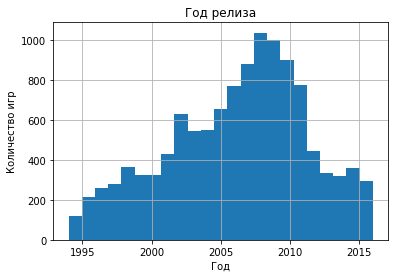

In [94]:
bins = data['year_of_release'].max() - data['year_of_release'].min() + 1

print(data['year_of_release'].describe())
data['year_of_release'].hist(bins=bins)
plt.title("Год релиза")
plt.ylabel("Количество игр")
plt.xlabel("Год")
None

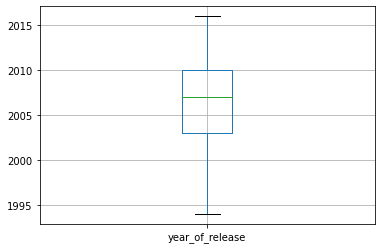

In [68]:
data.boxplot(column='year_of_release')
None

График показал, что игры которые выпускались ранее 1993 года можно считать выбросами. Удалим их.

In [14]:
data = data.query('year_of_release > 1993')

## Данные по платформам

In [15]:
platforms = data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platforms_top_10_list = platforms.reset_index().head(10)['platform'].unique()
platforms_top_10 = platforms.head(10)
platforms_top_10

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


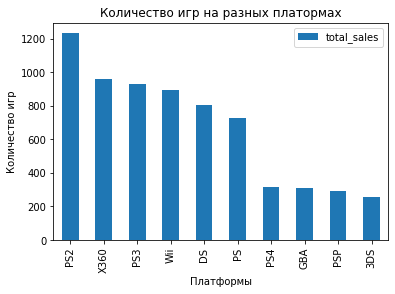

In [66]:
platforms_top_10.plot(kind='bar')
plt.title("Количество игр на разных платормах")
plt.ylabel("Количество игр")
plt.xlabel("Платформы")
None

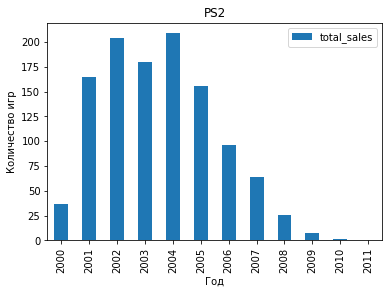

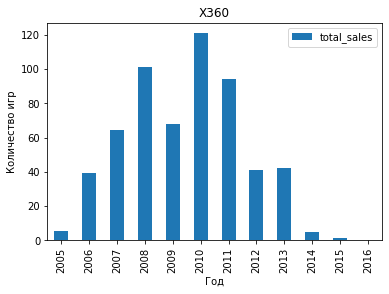

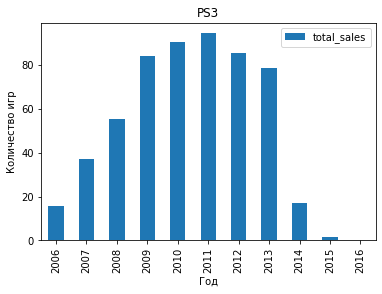

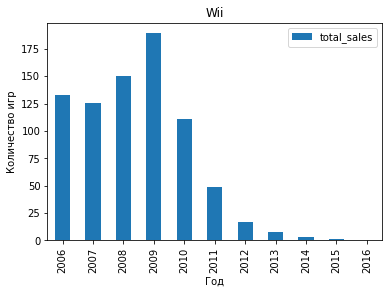

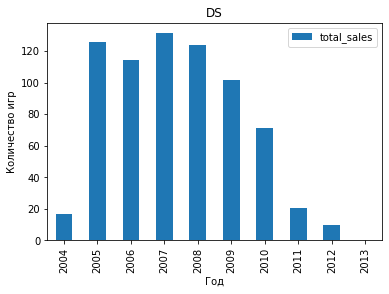

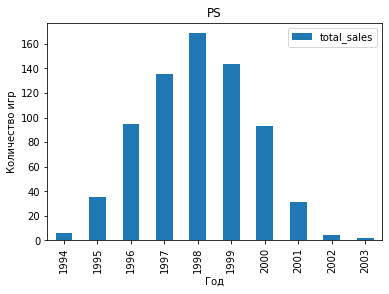

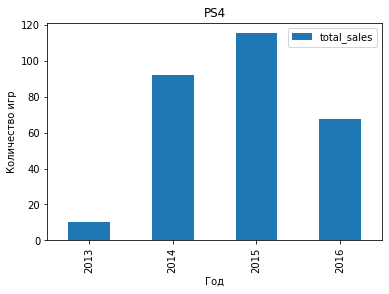

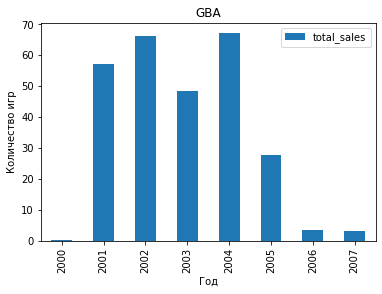

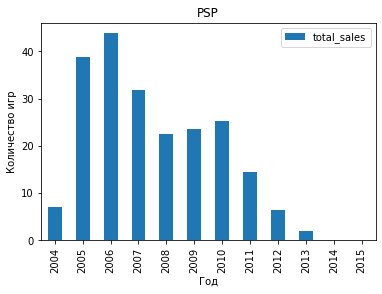

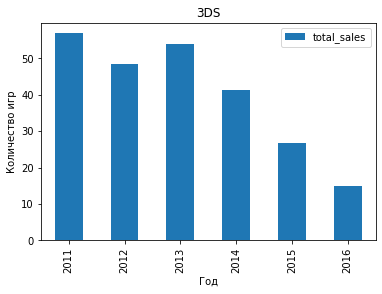

In [69]:
for platform in platforms_top_10_list:
    data[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar')
    plt.title(platform)
    plt.ylabel("Количество игр")
    plt.xlabel("Год")

В среднем платформы существуют примерно по 8 лет, в зависимости от их успеха, полагаю. Учитывая что прогноз необходимо сделать на 2017 год, думаю что актуальный период можно считать половиной времени от жизни платформы, так мы будем учитывать только те платформы, которые находятся в самом рассвете, и отсеем загибающиеся платформы, которые будут негативно влиять на статискику. Актульный период 2012 - 2016. 

## Актуальный период

In [18]:
current_data = data.query('year_of_release >= 2012')
current_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


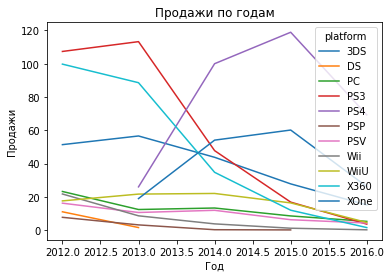

In [70]:
current_data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot()
plt.title("Продажи по годам")
plt.ylabel("Продажи")
plt.xlabel("Год")
None

Удивительно, но нет ни одной платформы, которая бы шла на повышение. Однозначным лидером по продажам можно назвать PS4, что логично, учитывая что она появилась только в 2013. Также на фоне остальных неплохо выглядит Xone. Она вышла в тот же год что и PS4, однако показывает более низкие продажи. на тртьем месте 3DS. Все остальные платформы спрос практически упал.

Очевидно, что самыми прибыльными сейчас можно счиать актуальные PS4 и Xone.

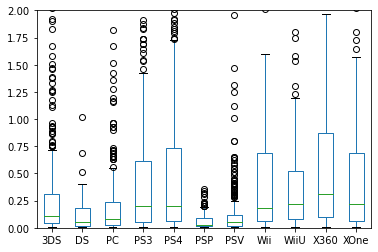

In [20]:
current_data.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,2))
plt.title("Продажи по платформам")
plt.ylabel("Продажи")
plt.xlabel("Платформа")
None

График подтверждает выводы выше: хорошие результаты показывает Xone и PS4. PS3 и X360 тоже держаться в топе, однако спрос на эти консоли предыдущего поколения стремительно падает, поэтому они являются потенциально не продаваемыми в будущем

По грaфику видно, что лучшие платформы по медианным значениям это: X360, Xone, Wiiu, PS3 и PS4. Рассматривая эти графики ближе, можно заметить, что межквартильные размах самый большой у X360, а самый маленькой в этой выборке у WiiU. Остальные имеют примерно одинаковые средние межквартильные размахи. Также видно, что для этой подююорки платформ выбросы довольно редки, чего не скажешь о платформах которые показывают хуэе результаты и имеют меньшее значение медианы. Худшие по этому показателю: PSP, PSV и DC.

## Данные рейтингам от критиков и пользователей

### PS4

Изучим влияние отзывов критиков и пользователей на продаи внутри самой сейчас продаваемой платформе - PS4.

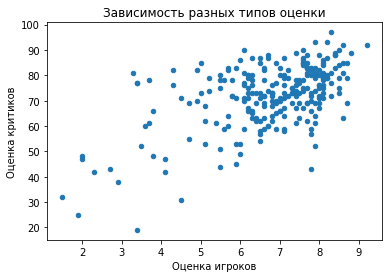

In [72]:
data_PS4 = current_data.query('platform == "PS4"')
data_PS4.plot(kind='scatter', x='user_score', y='critic_score')
plt.title("Зависимость разных типов оценки")
plt.ylabel("Оценка критиков")
plt.xlabel("Оценка игроков")
None

In [39]:
data_PS4[['critic_score','user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


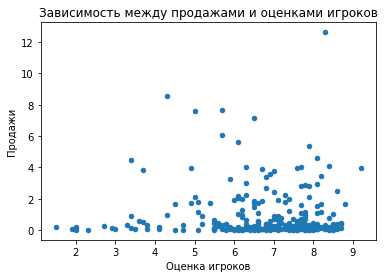

In [74]:
data_PS4.plot(kind='scatter', x='user_score', y='total_sales')
plt.title("Зависимость между продажами и оценками игроков")
plt.ylabel("Продажи")
plt.xlabel("Оценка игроков")
None

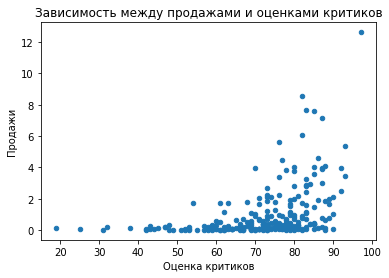

In [75]:
data_PS4.plot(kind='scatter', x='critic_score', y='total_sales')
plt.title("Зависимость между продажами и оценками критиков")
plt.ylabel("Продажи")
plt.xlabel("Оценка критиков")
None

Между продажами и оценками критиков прослеживается умеренная корреляция в то время как с оценокой игроков корреляция практически отсутсвует. можно сделать вывод что к критикам покупатели прислушиваются больше чем к игрокам, хотя это и не очевидно.

### XOne

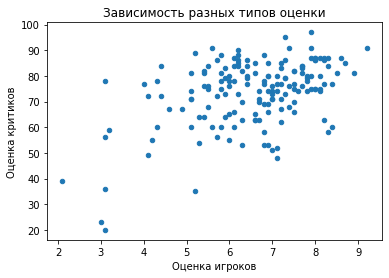

In [76]:
data_Xone = current_data.query('platform == "XOne"')
data_Xone.plot(kind='scatter', x='user_score', y='critic_score')
plt.title("Зависимость разных типов оценки")
plt.ylabel("Оценка критиков")
plt.xlabel("Оценка игроков")
None

In [78]:
data_Xone[['critic_score','user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


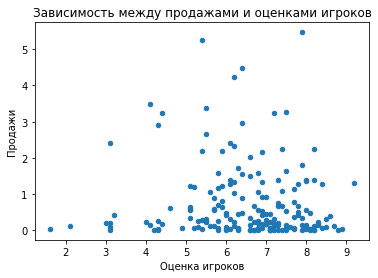

In [79]:
data_Xone.plot(kind='scatter', x='user_score', y='total_sales')
plt.title("Зависимость между продажами и оценками игроков")
plt.ylabel("Продажи")
plt.xlabel("Оценка игроков")
None

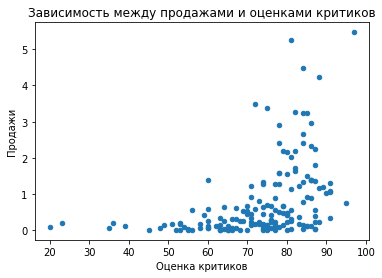

In [80]:
data_Xone.plot(kind='scatter', x='critic_score', y='total_sales')
plt.title("Зависимость между продажами и оценками критиков")
plt.ylabel("Продажи")
plt.xlabel("Оценка критиков")
None

Здесь ситуация похожая с PS4. С оценками критиков у продаж умеренная корреляция, с оценками игроков корреляция практически отсутсвует

### 3DS

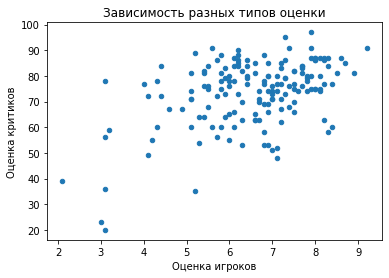

In [81]:
data_3ds = current_data.query('platform == "3DS"')
data_Xone.plot(kind='scatter', x='user_score', y='critic_score')
plt.title("Зависимость разных типов оценки")
plt.ylabel("Оценка критиков")
plt.xlabel("Оценка игроков")
None

In [82]:
data_3ds[['critic_score','user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.722762,0.320803
user_score,0.722762,1.000000,0.197583
total_sales,0.320803,0.197583,1.000000


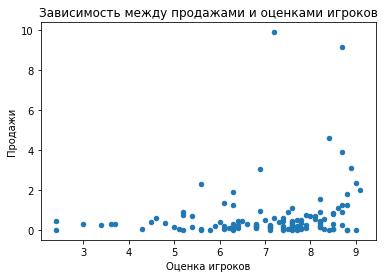

In [83]:
data_3ds.plot(kind='scatter', x='user_score', y='total_sales')
plt.title("Зависимость между продажами и оценками игроков")
plt.ylabel("Продажи")
plt.xlabel("Оценка игроков")
None

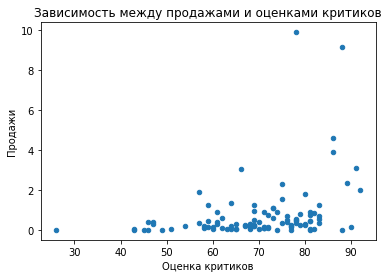

In [84]:
data_3ds.plot(kind='scatter', x='critic_score', y='total_sales')
plt.title("Зависимость между продажами и оценками критиков")
plt.ylabel("Продажи")
plt.xlabel("Оценка критиков")
None

Ситуация с этой платформой немного отличается от двух предыдущих. Здесь также прослеживается умеренная корреляция с оценками критиков, однако и с оценками игроков появилась слабая корреляция. Однако все-таки можно сделать вывод что к критикам присушиваются немного больше.

### Вывод

Проанализировав зависимость продаж от разных типов оценки можно сделать вывод, что к критикам покупатели примлушиваются больше чем к игрокам. на всех трех самых популярных платформах выбранных мной прослеживается умеренная корреляция продаж от оценок критиков.

## Данные по жанрам

              total_sales
genre                    
Action             441.12
Shooter            304.73
Role-Playing       192.80
Sports             181.07
Misc                85.04
Platform            61.00
Racing              53.50
Fighting            44.49
Simulation          35.12
Adventure           29.43
Strategy            13.34
Puzzle               4.89


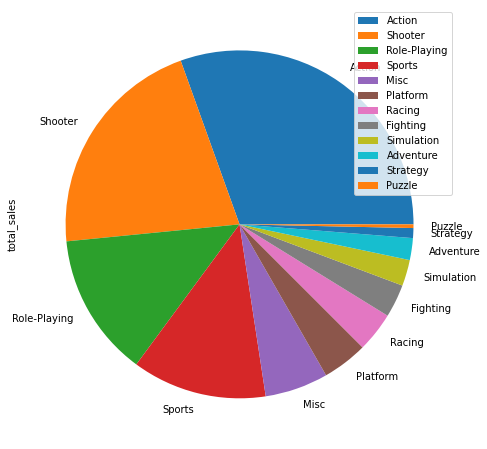

In [24]:
current_data_genre = current_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(ascending=False, by = 'total_sales')
print(current_data_genre)
current_data_genre.plot(kind='pie', subplots=True, figsize=(8,8))
None

Как видно по этим данным, самые прибыльные игры это экш, шутеры, ролевые игры и спортивные игры. Наименее прибыльные это пазлы и стратегии.

              total_sales
genre                    
Shooter             0.440
Sports              0.240
Platform            0.210
Role-Playing        0.140
Racing              0.140
Fighting            0.130
Action              0.120
Misc                0.120
Simulation          0.120
Strategy            0.080
Puzzle              0.045
Adventure           0.030


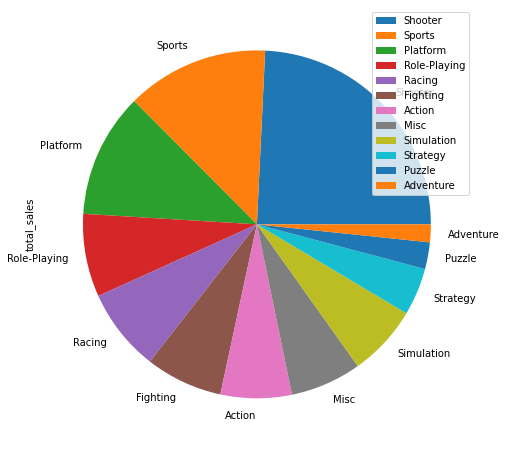

In [85]:
current_data_genre = current_data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(ascending=False, by = 'total_sales')
print(current_data_genre)
current_data_genre.plot(kind='pie', subplots=True, figsize=(8,8))
None

Проанализировав медианные значения продаж по жанрам можно сделать вывод, что жанр action, лидер предыдущего пункта здесь сместился аж на 7 место. Объянисть это я думаю можно наличие игр-бестселеров в данном жанре. Жанр shooter остался в топе, поднялся со второго на первое место, и видно, что спортивные игры в среднем неплохо продаются. Ролевой жанр тоже остался на неплохом месте, спустивщись с третьего на четвертое.

## Вывод по шаг 3

1. Данные 1993 были рассмотрены как выбросы и удалены.
2. В среднем, платформа "живет" около восьми лет. Разумеется бывают более короткие и более длиные периоды их жизни.
3. Были рассмотрены данные за актуальный период. Период я считал актуальным взяв половину срока жизни платформ, чтобы исключить платформы срок жизни которых подходит к концу.
4. Были выявлены 2 наиболее перспективные платформы, это Xone и PS4.
5. Была выявлена умеренная корреляция количества продаж игры от оценки критиков.
6. Самые прибыльные жанры это Action, shooter и Role-Playing игры. Самые не прибыльные это пазлы и спортивные игры.

# Шаг 4. Портрет пользователя.

## Консоли

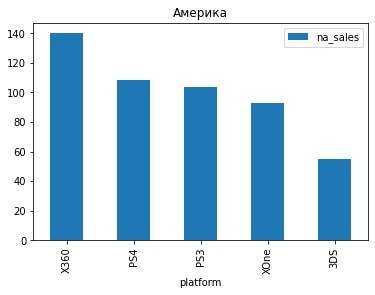

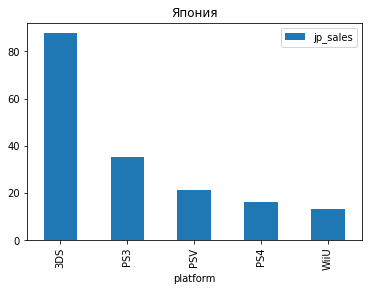

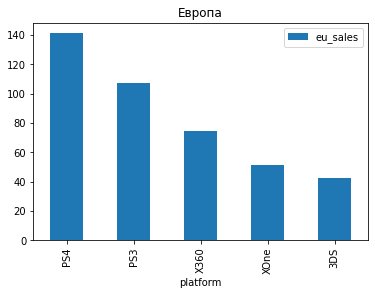

In [25]:
current_data_na = current_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
current_data_na.head().plot(kind='bar', title='Америка')
current_data_jp = current_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
current_data_jp.head().plot(kind='bar', title='Япония')
current_data_eu = current_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
current_data_eu.head().plot(kind='bar', title='Европа')
None

Как мы видим, регионы сильно отличаются по популярности платформ.  
Америка предпочитает американские X-box, однако и PS в Америке пользуется популярностью.  
В японии самую большую популярность завоевала японская Nintendo, а ней идет доминация также японской PS, а на пятом месте отсутсвующая в других регионах в топе тоже японская Wiiu. В этом плане японцев можно считать большими патриотами.  
В Европе больше всего пользуются PS которая существенно опережает идущую за ней Xbox.  
Можно сделать вывод, что игроки из разных стран предпочитают отечественные консоли.


## Жанры

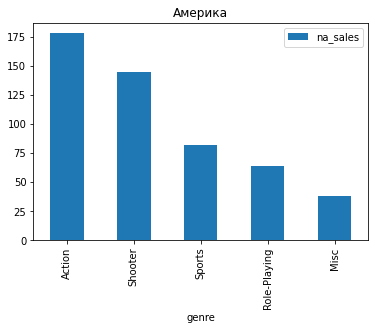

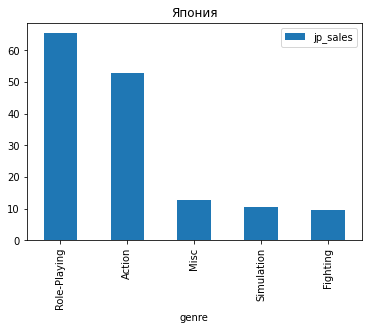

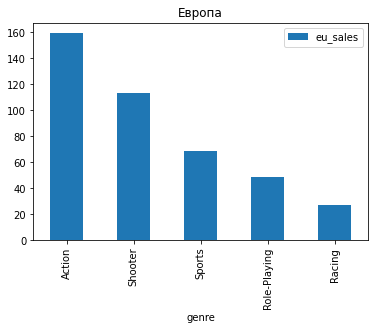

In [26]:
current_data_na = current_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
current_data_na.head().plot(kind='bar', title='Америка')
current_data_jp = current_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
current_data_jp.head().plot(kind='bar', title='Япония')
current_data_eu = current_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
current_data_eu.head().plot(kind='bar', title='Европа')
None

Вкус у игроков из Амереки и из Европы практически полностью совпадают. Думаю это связано с похожим 'западным' менталитетом. А вот японские вкусы довольно специфичны. Известный факт что японцы любят ролевые игры, поэтому факт их первенства в этой стране кажется очевидным. На втором месте в японии популярный во всем мире жанр экш. Остальные места занимают непопулярные в остальном мире жанры, думаю это связано со спецификой менталитета.

## Рейтинг ESRB

In [27]:
current_data['regions_sales'] = current_data['na_sales'] + current_data['eu_sales'] + current_data['jp_sales']
current_data['regions_sales']

/tmp/ipykernel_72/998838406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['regions_sales'] = current_data['na_sales'] + current_data['eu_sales'] + current_data['jp_sales']


16       17.09
23       14.86
31       12.25
33       13.82
34       11.37
         ...  
16703     0.01
16707     0.01
16710     0.01
16712     0.01
16714     0.01
Name: regions_sales, Length: 2886, dtype: float64

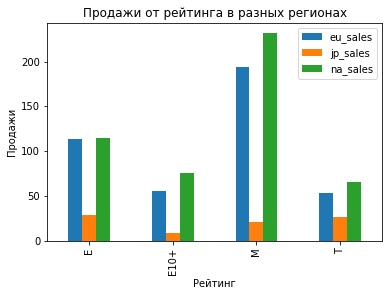

In [87]:
current_data_esrb = current_data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
current_data_esrb.plot(kind='bar')
plt.title("Продажи от рейтинга в разных регионах")
plt.ylabel("Продажи")
plt.xlabel("Рейтинг")
None

Можно сделать вывод, что рейтинг ESRB влияет на продажу игр только в Америке и Европе. Японцы на этот рейтинг не ориентируются.

Топовые продажи в Японии Приходятся на средние по продажам рейтиги в европе и америке - Е и Т. В свою очередь самый топовый по продажам рейтинг Т в японии показывает чуть ли не худшие продажи в дургих странах, на равне с рейтингом Е10+, который показывает плохие продажи во всех странах. Учитывая что М это рейтинг для более жестоких игр, можно сделать вывод что в европе и америке больше любят жестокие игры. Рейтинг Т который популярен в Японии это рейтинг 13+.

## Вывод по шаг 4

Как мы видим, регионы сильно отличаются по популярности платформ.  
Америка предпочитает американские X-box, однако и PS в Америке пользуется популярностью.  
В японии самую большую популярность завоевала японская Nintendo, а ней идет доминация также японской PS, а на пятом месте отсутсвующая в других регионах в топе тоже японская Wiiu. В этом плане японцев можно считать большими патриотами.  
В Европе больше всего пользуются PS которая существенно опережает идущую за ней Xbox.  
Можно сделать вывод, что игроки из разных стран предпочитают отечественные консоли.


Вкус у игроков из Амереки и из Европы практически полностью совпадают. Думаю это связано с похожим 'западным' менталитетом. А вот японские вкусы довольно специфичны. Известный факт что японцы любят ролевые игры, поэтому факт их первенства в этой стране кажется очевидным. На втором месте в японии популярный во всем мире жанр экш. Остальные места занимают непопулярные в остальном мире жанры, думаю это связано со спецификой менталитета.

Можно сделать вывод, что рейтинг ESRB влияет на продажу игр только в Америке и Европе. Японцы на этот рейтинг не ориентируются.

# Шаг 5. Проверка гипотез.

### Нулевая гипотеза: Средние пользовательские оценки платформ Xone и PC одинаковые. Альтернативная гипотеза: Средние пользовательские оценки платформ Xone и PC не одинаковые.

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64


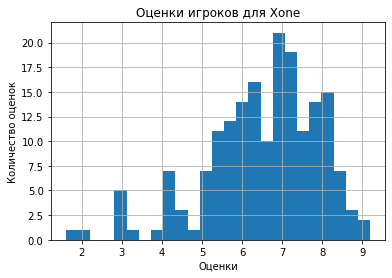

In [90]:
current_data_xbox = current_data.query('platform == "XOne" & user_score>0')
print(current_data_xbox['user_score'].describe())          
current_data_xbox['user_score'].hist(bins=25)
plt.title("Оценки игроков для Xone")
plt.ylabel("Количество оценок")
plt.xlabel("Оценки")
None

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64


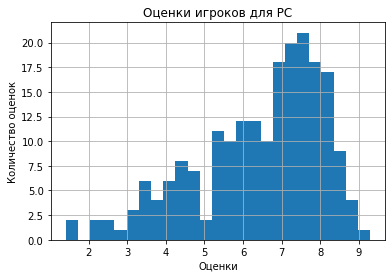

In [91]:
current_data_pc = current_data.query('platform == "PC" & user_score>0')
print(current_data_pc['user_score'].describe())          
current_data_pc['user_score'].hist(bins=25)
plt.title("Оценки игроков для PC")
plt.ylabel("Количество оценок")
plt.xlabel("Оценки")
None

In [31]:
alpha = 0.05

results = st.ttest_ind(current_data_xbox['user_score'], current_data_pc['user_score'])

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


значение pvalue гораздо выше уровня статистической значимости,значит гипотезу отвергнуть не получилось. Оценки у этих двух платформ не так уж сильно разничаются

### Нулевая гипотеза: Средние пользовательские оценки жанров action и sport одинаковые. Альтернативная гипотеза: Средние пользовательские оценки жанров action и sport не одинаковые.

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64


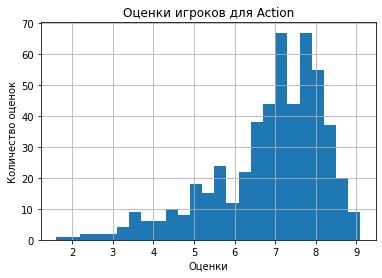

In [92]:
current_data_action = current_data.query('genre == "Action" & user_score>0')
print(current_data_action['user_score'].describe())          
current_data_action['user_score'].hist(bins=25)
plt.title("Оценки игроков для Action")
plt.ylabel("Количество оценок")
plt.xlabel("Оценки")
None

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64


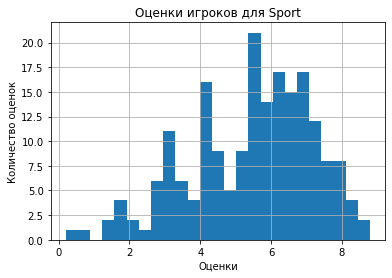

In [93]:
current_data_sport = current_data.query('genre == "Sports" & user_score>0')
print(current_data_sport['user_score'].describe())          
current_data_sport['user_score'].hist(bins=25)
plt.title("Оценки игроков для Sport")
plt.ylabel("Количество оценок")
plt.xlabel("Оценки")
None

In [34]:
alpha = 0.05

results = st.ttest_ind(current_data_action['user_score'], current_data_sport['user_score'])

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


### Вывод по шаг 5

У первой гипотезы значение pvalue гораздо выше уровня статистической значимости,значит гипотезу отвергнуть не получилось. Оценки у этих двух платформ не так уж сильно разничаются

У второй гипотезы значение pvalue гораздо ниже уровня статистической значимости, значит гипотезу необходимо отвергнуть. Оценки игр этих жанров очень сильно различаются. Вычислив среднее значение этих выборок, хочется отметить что у игр в жанре спорт в среднем на полтора балла оценка ниже.

# Вывод

В ходе предобработки данных назнания столбцов были приведены к нижнему регистру, удалены строки с пропусками в колонке с названием игры, изменены типы данных некоторых столбцов, добавлена колонка с суммарными продажами по каждой игре.

Также была проведена работа по удалению полных и неполных дубликатов.

Была проведена работа по изучению столбцов и сделаны следующие шаги:

1. Данные 1993 были рассмотрены как выбросы и удалены.
2. В среднем, платформа "живет" около восьми лет. Разумеется бывают более короткие и более длиные периоды их жизни.
3. Были рассмотрены данные за актуальный период. Период я считал актуальным взяв половину срока жизни платформ, чтобы исключить платформы срок жизни которых подходит к концу.
4. Были выявлены 2 наиболее перспективные платформы, это Xone и PS4.
5. Была выявлена умеренная корреляция количества продаж игры от оценки критиков.
6. Самые прибыльные жанры это Action, shooter и Role-Playing игры. Самые не прибыльные это пазлы и спортивные игры.

Был нарисован портрет типичного пользователя для каждого региона. На продажи в регионах влияются следующие параметры: платформа, на которой выпускается игра; жанр игры; рейтинг критиков. Также для европы и америки значение имеет рейтинг ESRB.

Топовые продажи в Японии Приходятся на средние по продажам рейтиги в европе и америке - Е и Т. В свою очередь самый топовый по продажам рейтинг Т в японии показывает чуть ли не худшие продажи в дургих странах, на равне с рейтингом Е10+, который показывает плохие продажи во всех странах. Учитывая что М это рейтинг для более жестоких игр, можно сделать вывод что в европе и америке больше любят жестокие игры. Рейтинг Т который популярен в Японии это рейтинг 13+.

Вкус у игроков из Амереки и из Европы практически полностью совпадают. Думаю это связано с похожим 'западным' менталитетом. А вот японские вкусы довольно специфичны. Известный факт что японцы любят ролевые игры, поэтому факт их первенства в этой стране кажется очевидным. На втором месте в японии популярный во всем мире жанр экш. Остальные места занимают непопулярные в остальном мире жанры, думаю это связано со спецификой менталитета.

Регионы сильно отличаются по популярности платформ.  
Америка предпочитает американские X-box, однако и PS в Америке пользуется популярностью.  
В японии самую большую популярность завоевала японская Nintendo, а ней идет доминация также японской PS, а на пятом месте отсутсвующая в других регионах в топе тоже японская Wiiu. В этом плане японцев можно считать большими патриотами.  
В Европе больше всего пользуются PS которая существенно опережает идущую за ней Xbox.  
Можно сделать вывод, что игроки из разных стран предпочитают отечественные консоли.


Таким образом идеальная игра для японца будет выпускаться на 3DS, жанра ролевой игры.  
Идеальная игра для европейца это экшн на PS4 с рейтингом М.  
Идеальная игра для американца это экшн на XOne с рейтигом М.

Также было предположено и проверено, что оценки у платформ PC и PS4 почти одинаковые, а также что у жанров Action и Sports оценки очень сильно отличаются. В среднем Action имеет на 1.5 балла больше чем Sports

Думаю в следующих исследования было бы интересно посмотреть на то как менялись оценки зритетей и критиков в зависимости от года, а также посмотреть менялось ли влияние этиъ оценок на продажи по годам